## Q3

In [51]:
import numpy as np
import matplotlib.pyplot as plt

Useful functions

In [52]:
def relu(Z):
    return np.maximum(0,Z)
## RelU backward
def relu_backward(Z):
    return 1.*(Z>0)

#Loss function
def mse_loss(Y_hat, Y_true):
    return np.mean((Y_hat - Y_true) ** 2)

In [53]:
class MLP:
    def __init__(self, input_layer, hidden_layer1, hidden_layer2,output_layer):

        self.W1 = np.random.randn(hidden_layer1, input_layer)
        self.b1 = np.zeros((hidden_layer1, 1))

        self.W2 = np.random.randn(hidden_layer2, hidden_layer1)
        self.b2 = np.zeros((hidden_layer2, 1))

        self.W3 = np.random.randn(output_layer, hidden_layer2)
        self.b3 = np.zeros((output_layer, 1))

    def forward(self, X):
      #Wi.xi + b
        self.Z1 = np.dot(self.W1, X) + self.b1
        self.A1 = relu(self.Z1)
        #layer 2
        self.Z2 = np.dot(self.W2, self.A1) + self.b2
        self.A2 = relu(self.Z2)
        #output layer
        self.Z3 = np.dot(self.W3, self.A2) + self.b3
        self.A3 = self.Z3
        return self.A3

    def backward(self, X, Y, learning_rate):
        m = X.shape[1]
        dZ3 = 2 * (self.A3 - Y)
        dW3 = (1 / m) * np.dot(dZ3, self.A2.T)
        db3 = (1 / m) * np.sum(dZ3, axis=1, keepdims=True)

        dZ2 = np.dot(self.W3.T, dZ3) *relu_backward(self.Z2)
        dW2 = (1 / m) * np.dot(dZ2, self.A1.T)
        db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)

        dZ1 = np.dot(self.W2.T, dZ2) *relu_backward(self.Z1)
        dW1 = (1 / m) * np.dot(dZ1, X.T)
        db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)

        # Update with gradiant descent formula
        self.W3 -= learning_rate * dW3
        self.b3 -= learning_rate * db3
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1

    def train(self, X, Y, num_iterations, learning_rate):
        for i in range(num_iterations):
            output = self.forward(X)
            self.backward(X, Y, learning_rate)
            if i % 100 == 0:
                loss = mse_loss(output, Y)
                print(f"Epoch {i}, Loss: {loss}")



X_train = np.arange(-3, 3, 0.1).reshape(1, -1)
Y_train = X_train ** 2

mlp = MLP(input_layer=1, hidden_layer1=16, hidden_layer2=16,output_layer=1)
mlp.train(X_train, Y_train, num_iterations=2000, learning_rate=0.01)


X_test = np.arange(-3, 3, 0.1).reshape(1, -1)
predictions = mlp.forward(X_test)
print("Predictions:")
print(predictions)
print("Actual values:")
print(X_test ** 2)

Epoch 0, Loss: 124.68484296671338
Epoch 100, Loss: 0.15543878656076318
Epoch 200, Loss: 0.06471937060189446
Epoch 300, Loss: 0.03789536330559897
Epoch 400, Loss: 0.02529342658839911
Epoch 500, Loss: 0.018253385953440598
Epoch 600, Loss: 0.013671811665460738
Epoch 700, Loss: 0.011658049631111566
Epoch 800, Loss: 0.009582936601996939
Epoch 900, Loss: 0.008697920662745644
Epoch 1000, Loss: 0.00811432210578126
Epoch 1100, Loss: 0.0076069844784394805
Epoch 1200, Loss: 0.007230366844426933
Epoch 1300, Loss: 0.006944248314630558
Epoch 1400, Loss: 0.006709624494993129
Epoch 1500, Loss: 0.0065284937153185195
Epoch 1600, Loss: 0.005895976158942666
Epoch 1700, Loss: 0.005644526569116663
Epoch 1800, Loss: 0.005486009036034161
Epoch 1900, Loss: 0.0052541286211290755
Predictions:
[[8.85271961e+00 8.34781533e+00 7.84291106e+00 7.33800679e+00
  6.83310251e+00 6.32819824e+00 5.82329397e+00 5.33074404e+00
  4.83826215e+00 4.34578025e+00 3.91301945e+00 3.58812843e+00
  3.25713544e+00 2.92614246e+00 2.595

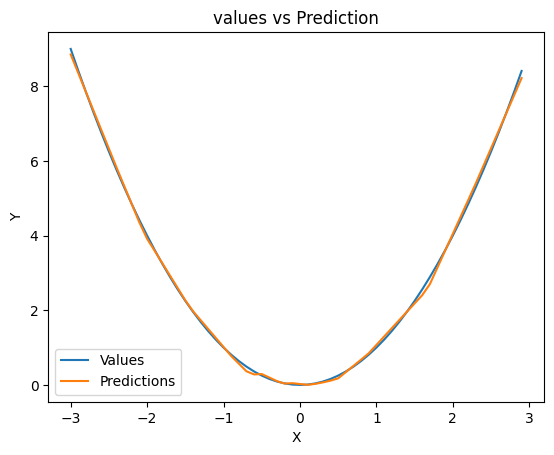

In [54]:
#plot sections
plt.plot(X_test.flatten(), X_test.flatten() ** 2, label='Values')
plt.plot(X_test.flatten(), predictions.flatten(), label='Predictions')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('values vs Prediction')
plt.legend()
plt.show()

## Q4

In [104]:
binary_sequences = [[0, 1, 0, 0, 0, 0], [1, 1, 1, 1, 0, 0]]
input_size = 6

#weight_matrix
weight_matrix = np.zeros((input_size, input_size))
for binary_sequence in binary_sequences:
    binary = np.array(binary_sequence)
    weight_matrix += np.outer(binary, binary)
np.fill_diagonal(weight_matrix, 0)
print("weight Matrix")
print(weight_matrix)

def update(pattern, matrix):
    sum = np.dot(matrix, pattern)
    updated_state = np.sign(sum)
    return updated_state

def convergence(current, previous):
    return np.array_equal(current, previous)

def run_hopfield_network(pattern, weight_matrix):
    current = pattern.copy()
    previous = np.zeros_like(pattern)

    while not convergence(current, previous):

        previous = current.copy()
        current = update(current, weight_matrix)
    return current


result = run_hopfield_network(binary_sequences[0], weight_matrix)
print("Result:", result)





weight Matrix
[[0. 1. 1. 1. 0. 0.]
 [1. 0. 1. 1. 0. 0.]
 [1. 1. 0. 1. 0. 0.]
 [1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
Result: [1. 1. 1. 1. 0. 0.]


## Q5

In [67]:
#For example : consider a 10*10 Kohenon map with different coordinate weights
#random weight initialization
x = np.random.rand(100)
y = np.random.rand(100)
som = np.column_stack((x, y)) * 1000
#initialize Hyperparameters:
iterations = 600
sigma = 30
learning_rate= 0.3
#define Gaussian function
radius = np.random.rand()
def Gaussian_neighborhood(radius, r, sigma):
  return  np.exp(-(np.abs(radius - r) ** 2) / (2 * sigma ** 2))
# Competition , Cooperation and adaptation
#Imagenary data list (not empty in reality)
Data = []
for i in range(iterations):
  #decrease sigma value in each round in order to be more accurate in farther iterations
    sigma -= 0.05
    for j in range(len(Data)):
        #Competition of neorons for each data
        r_min = np.argmin(np.linalg.norm(som - Data[j], axis=1))
        #Adaptation and update weight values
        for k in range(len(som)):
            som[k] += learning_rate * Gaussian_neighborhood(k, r_min, sigma) * (Data[j] - som[k])

